
**8.18** List all samples of size n = 2 that are possible (with replacement) from the population in Problem 8.17(p(x) = 1/3 for x = 9, 12, and 15). Use the chart wizard of Excel (or any statistical tool) to plot the sampling distribution of the mean to show that
μx̄ = μ and σ²x̄ = σ² / 2.


All possible samples (n=2 with replacement):
   A  B mean
1  9  9  9.0
2 12  9 10.5
3 15  9 12.0
4  9 12 10.5
5 12 12 12.0
6 15 12 13.5
7  9 15 12.0
8 12 15 13.5
9 15 15 15.0

Sampling Distribution of the Mean:
  xbar Frequency Probability
1  9.0         1   0.1111111
2 10.5         2   0.2222222
3 12.0         3   0.3333333
4 13.5         2   0.2222222
5 15.0         1   0.1111111

Population mean (mu): 12.00
Mean of sampling distribution (mu_xbar): 12.00
mu_xbar = mu? TRUE

Population variance (sigma^2): 6.00
sigma^2/n = sigma^2/2 = 3.00
Variance of sampling distribution (sigma^2_xbar): 3.00
sigma^2_xbar = sigma^2/2? TRUE



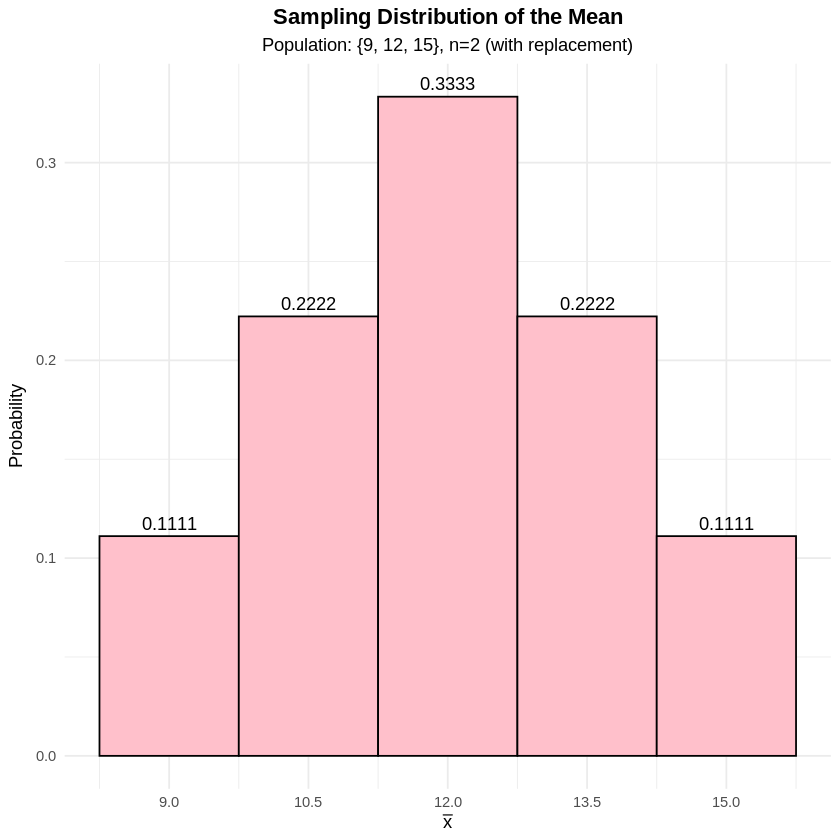

In [1]:
library(ggplot2)

population <- c(9, 12, 15)
n <- 2

## Generate possible samples n = 2 with replacement
all_samples <- expand.grid(A = population, B = population)
all_samples$mean <- rowMeans(all_samples[, c("A", "B")])

## Display all samples (possible)
cat("All possible samples (n=2 with replacement):\n")
print(all_samples[, c("A", "B", "mean")])
cat("\n")

## Create sampling dist
sampling_dist <- as.data.frame(table(all_samples$mean))
colnames(sampling_dist) <- c("xbar", "Frequency")
sampling_dist$xbar <- as.numeric(as.character(sampling_dist$xbar))
sampling_dist$Probability <- sampling_dist$Frequency / nrow(all_samples)

## Display sampling dist
cat("Sampling Distribution of the Mean:\n")
print(sampling_dist)
cat("\n")

## Calculate pop mean
mu <- mean(population)

## Calculate mean sampl dist
mu_xbar <- sum(sampling_dist$xbar * sampling_dist$Probability)

## Calculate popu variance
sigma_squared <- mean((population - mu)^2)
sigma_squared_xbar <- sum((sampling_dist$xbar - mu_xbar)^2 * sampling_dist$Probability)

cat(sprintf("Population mean (mu): %.2f\n", mu))
cat(sprintf("Mean of sampling distribution (mu_xbar): %.2f\n", mu_xbar))
cat(sprintf("mu_xbar = mu? %s\n\n", isTRUE(all.equal(mu, mu_xbar))))

cat(sprintf("Population variance (sigma^2): %.2f\n", sigma_squared))
cat(sprintf("sigma^2/n = sigma^2/%d = %.2f\n", n, sigma_squared/n))
cat(sprintf("Variance of sampling distribution (sigma^2_xbar): %.2f\n", sigma_squared_xbar))
cat(sprintf("sigma^2_xbar = sigma^2/2? %s\n\n", isTRUE(all.equal(sigma_squared/n, sigma_squared_xbar))))

## Plot
ggplot(sampling_dist, aes(x = xbar, y = Probability)) +
  geom_col(fill = "pink", color = "black", width = 1.5) +
  geom_text(aes(label = sprintf("%.4f", Probability)), vjust = -0.5) +
  labs(title = "Sampling Distribution of the Mean",
       subtitle = sprintf("Population: {%s}, n=%d (with replacement)",
                         paste(population, collapse=", "), n),
       x = expression(bar(x)),
       y = "Probability") +
  scale_x_continuous(breaks = sampling_dist$xbar) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5))


**8.21** A population consists of the four numbers 3, 7, 11, and 15. Consider all possible samples of size 2 that can be
drawn with replacement from this population. Find (a) the population mean, (b) the population standard deviation, (c) the mean of the sampling distribution of means, and (d ) the standard deviation of the sampling
distribution of means. Verify parts (c) and (d ) directly from (a) and (b) by using suitable formulas.

In [ ]:
population <- c(3,7,11,15)
population_size <- length(population)
sample_size <- 2
samples <- expand.grid(population, population)

## (a) population mean
population_mean <- mean(population)

## (b) population standard deviation
population_sd <- sqrt(sum((population - population_mean)^2) / population_size)

## (c) mean of the sampling distribution of means
sample_means <- rowMeans(samples)
sampling_distribution_mean <- mean(sample_means)

## (d) standard deviation of the sampling distribution of means
sampling_distribution_sd <- sd(sample_means)

## Verification using formulas
expected_sampling_mean <- population_mean
expected_sampling_sd <- population_sd / sqrt(sample_size)

cat(sprintf("Population mean: %f\n", population_mean))
cat(sprintf("Population standard deviation: %f\n", population_sd))
cat(sprintf("Mean of the sampling distribution of means: %f\n", sampling_distribution_mean))
cat(sprintf("Standard deviation of the sampling distribution of means: %f\n\n", sampling_distribution_sd))
cat(sprintf("Expected mean of the sampling distribution of means: %f\n", expected_sampling_mean))
cat(sprintf("Expected standard deviation of the sampling distribution of means: %f\n\n", expected_sampling_sd))

tolerance <- 0.15
if (abs(sampling_distribution_mean - expected_sampling_mean) < tolerance &&
    abs(sampling_distribution_sd - expected_sampling_sd) < tolerance) {
  cat("Verification complete: values are equal or close to expected output.\n")
} else {
  cat("Verification failed: values are NOT equal or close to expected output.\n")
}


Population mean: 9.000000
Population standard deviation: 4.472136
Mean of the sampling distribution of means: 9.000000
Standard deviation of the sampling distribution of means: 3.265986

Expected mean of the sampling distribution of means: 9.000000
Expected standard deviation of the sampling distribution of means: 3.162278

Verification complete: values are equal or close to expected output.


**8.34** Find the probability that of the next 200 children born, (a) less than 40% will be boys, (b) between 43% and 57% will be girls, and (c) more than 54% will be boys. Assume equal probabilities for the births of boys and
girls.

In [ ]:
simulate_births <- function (num_children, trials) {
  ## 0-boy 1-girl
  girls_per_trial <-replicate(trials, sum(sample(c(0,1),num_children, replace=TRUE)))

  girls_percentage <- girls_per_trial/num_children
  boys_percentage <- 1 - girls_percentage

  ## (a) probability that less than 40% will be boys
  proba_less_than_40_boys <- mean(boys_percentage < 0.40)

  ## (b) probability that between 43% and 57% will be girls
  proba_between_43and57_girls <- mean(girls_percentage >= 0.43 & girls_percentage <= 0.57)

  ## (c) probability that more than 54% will be boys
  proba_more_than_54_boys <- mean (boys_percentage > 0.54)

  return(list(
        proba_less_than_40_boys = proba_less_than_40_boys,
        proba_between_43and57_girls = proba_between_43and57_girls,
        proba_more_than_54_boys = proba_more_than_54_boys
    ))
}

result <- simulate_births(200, 10000)

cat(sprintf("The probability that of the next 200 children born less than 40%% will be boys is %.2f%%.\n", result$proba_less_than_40_boys * 100))
cat(sprintf("The probability that of the next 200 children born between 43%% and 57%% will be girls is %.2f%%.\n", result$proba_between_43and57_girls * 100))
cat(sprintf("The probability that of the next 200 children born more than 54%% will be boys is %.2f%%.\n", result$proba_more_than_54_boys * 100))

The probability that of the next 200 children born less than 40% will be boys is 0.16%.
The probability that of the next 200 children born between 43% and 57% will be girls is 96.47%.
The probability that of the next 200 children born more than 54% will be boys is 10.66%.


**8.49** The credit hour distribution at Metropolitan Technological College is as follows:

\begin{array}{ccccccc}
\text{x}&6&9&12&15&18\\
\text{p(x)}&0.1&0.2&0.4&0.2&0.1
\end{array}

Find μ and σ². Give the 25 (with replacement) possible samples of size 2, their means, and their probabilities.

In [ ]:
x <- c(6, 9, 12, 15, 18)
p_x <- c(0.1, 0.2, 0.4, 0.2, 0.1)

mean_x <- sum(x * p_x)
x_squared <- sum((x^2) * p_x)
variance <- x_squared - mean_x^2

cat(sprintf("Population mean (μ): %f\n", mean_x))
cat(sprintf("Population variance (σ²): %f\n\n", variance))

## Possible samples of size 2
samples <- expand.grid(x1 = x, x2 = x)
## Means of each sample
samples$mean <- rowMeans(samples)
## Probabilities of each sample
samples$probability <- p_x[match(samples$x1, x)] * p_x[match(samples$x2, x)] * 100

print(samples)


Population mean (μ): 12.000000
Population variance (σ²): 10.800000

   x1 x2 mean probability
1   6  6  6.0           1
2   9  6  7.5           2
3  12  6  9.0           4
4  15  6 10.5           2
5  18  6 12.0           1
6   6  9  7.5           2
7   9  9  9.0           4
8  12  9 10.5           8
9  15  9 12.0           4
10 18  9 13.5           2
11  6 12  9.0           4
12  9 12 10.5           8
13 12 12 12.0          16
14 15 12 13.5           8
15 18 12 15.0           4
16  6 15 10.5           2
17  9 15 12.0           4
18 12 15 13.5           8
19 15 15 15.0           4
20 18 15 16.5           2
21  6 18 12.0           1
22  9 18 13.5           2
23 12 18 15.0           4
24 15 18 16.5           2
25 18 18 18.0           1
